In [3]:
from sympy import *
from dtumathtools import *
init_printing()

x, k_s, phi, w, t, A = symbols('x k_s phi w t A', real=True)
delta = symbols('delta', real=True, positive=True)

# 1.2

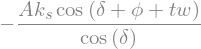

In [4]:
k = k_s*(E**(I*delta)/cos(delta))
z = A*E**(I*(w*t+phi))
x = re(z)
F_FHM = re((-k*z).simplify())
F_FHM

In [5]:
def F_func(ks, d):
    return F_FHM.subs({A: 1, phi:0, w:1, k_s:ks, delta: d})

# 1.3

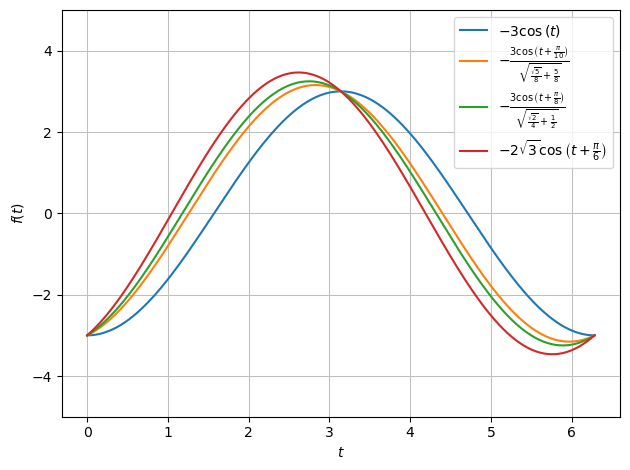

In [6]:
p1 = dtuplot.plot(F_func(3, 0), (t,0,2*pi), ylim = (-5,5), show=False)
p2 = dtuplot.plot(F_func(3, pi/10), (t,0,2*pi), ylim = (-5,5), show=False)
p3 = dtuplot.plot(F_func(3, pi/8), (t,0,2*pi), ylim = (-5,5), show=False)
p4 = dtuplot.plot(F_func(3, pi/6), (t,0,2*pi), ylim = (-5,5), show=False)
comb = p1+p2+p3+p4
comb.show()

In [7]:
fx = x.subs({A:1, phi:0, w:1})
fx

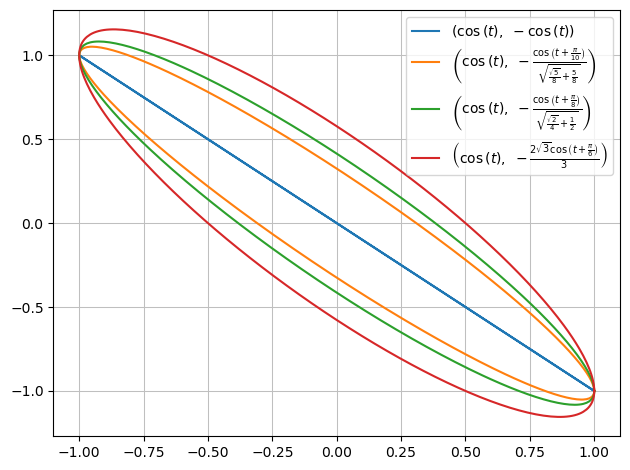

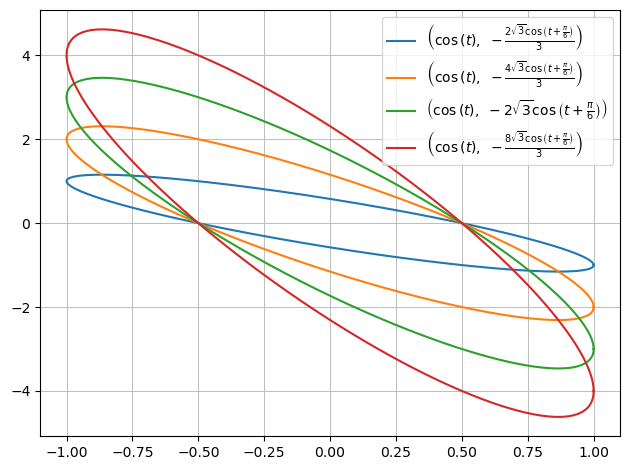

In [8]:
def plotkks(ks, d):
    comb = sum([dtuplot.plot_parametric(
        *Matrix([fx,F_func(ks, delta)]),
        (t,0,2*pi), use_cm=False, show=False) for delta in d])
    comb.show()

def plotkd(ks, d):
    comb = sum([dtuplot.plot_parametric(
        *Matrix([fx,F_func(ks_, d)]), 
        (t,0,2*pi), use_cm=False, show=False) for ks_ in ks])
    comb.show()

plotkks(1, [0, pi/10, pi/8, pi/6])
plotkd([1, 2, 3, 4], pi/6)

# 1.4

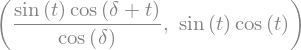

In [9]:
xd = diff(x,t)
inte = (F_FHM*xd).subs({A:1, phi:0, w:1, k_s: 1})
inte, inte.subs({delta:0})

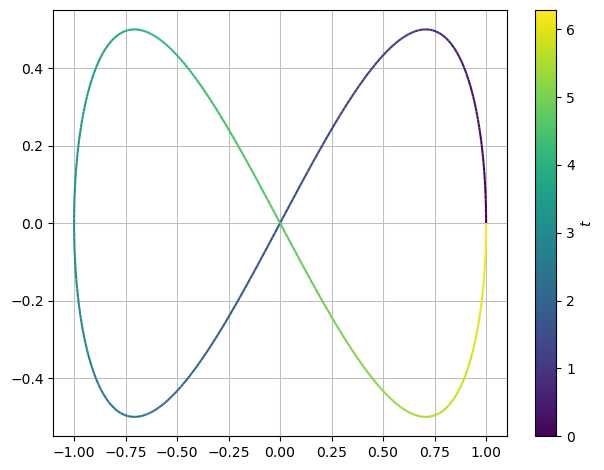

In [10]:
dtuplot.plot_parametric(*Matrix([fx,inte.subs({delta:0})]), (t,0,2*pi))

In [11]:
t1 = (t, 0, 2*pi)

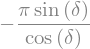

In [12]:
E1 = integrate(inte, t1)
E1

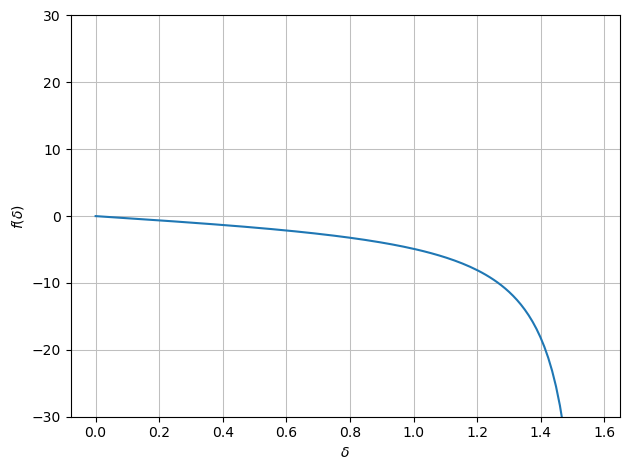

In [13]:
dtuplot.plot(E1, (delta, 0, pi/2), ylim = (-30,30))

# Andre måder at få FFHM på med andre simplify metoder

In [14]:
k = k_s*(1 + tan(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
aws = re((-k*z).simplify())
aws

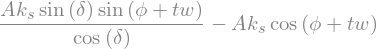

In [15]:
from sympy.simplify.fu import *
TR2(aws)

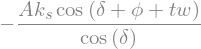

In [16]:
k = k_s*(1 + sin(delta)/cos(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
aws = re((-k*z).simplify())
aws

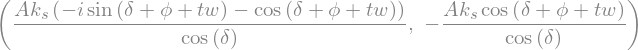

In [17]:
TR8(-k*z), re(TR8(-k*z))

In [18]:
m, k_s, d = symbols('m k_s d', real=True, positive=True) 
la, c = symbols('lambda c')

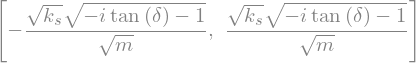

In [19]:
k = k_s*(1+tan(delta)*I)
z = c*E**(la * t)
la_sol = solve(Eq(m * z.diff(t,2) + k * z, 0), [la])
la_sol

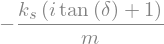

In [20]:
la2_sol = solve(Eq(m * z.diff(t,2) + k * z, 0),la**2)[0]
la2_sol

In [21]:
r, th = symbols('r theta', real=True)
la1 = r*(cos(th) + I * sin(th))

In [22]:
l1re, l1im = re(la1**2).simplify(), im(la1**2).simplify()
l1re, l1im

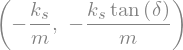

In [23]:
l2re, l2im = re(la2_sol), im(la2_sol)
l2re, l2im

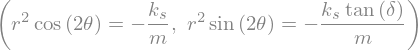

In [24]:
eq1, eq2 = Eq(l1re, l2re), Eq(l1im, l2im)
eq1, eq2

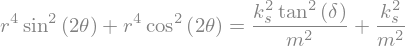

In [25]:
eq3 = Eq(eq1.lhs**2 + eq2.lhs**2 , eq1.rhs**2 + eq2.rhs**2)
eq3

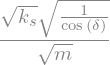

In [26]:
r2 = sqrt(k_s / (m * cos(delta)))
r2

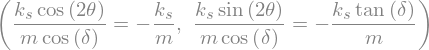

In [27]:
eq1.subs(r, r2), eq2.subs(r, r2)

In [28]:
eq4 = Eq(tan(2*th),tan(delta))
eq4

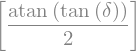

In [29]:
solve(eq4, th)

In [30]:
dm, al, be = symbols('delta_m a b', real=True, positive=True)
l1 = (al + be*I) * E**(r*(cos(delta/2 + pi/2)+sin(delta/2 + pi/2)*I)*t)
l1

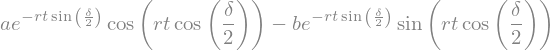

In [31]:
x = re(l1)
x

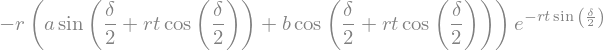

In [32]:
x.diff(t).simplify()

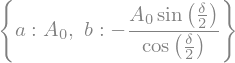

In [33]:
A_0 = symbols('A_0', real=True)
xbet_sol = solve([Eq(x.subs(t,0),A_0), Eq((x.diff(t)).subs(t,0), 0)], [al, be])
xbet_sol

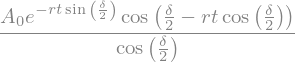

In [34]:
x.subs(xbet_sol).simplify()

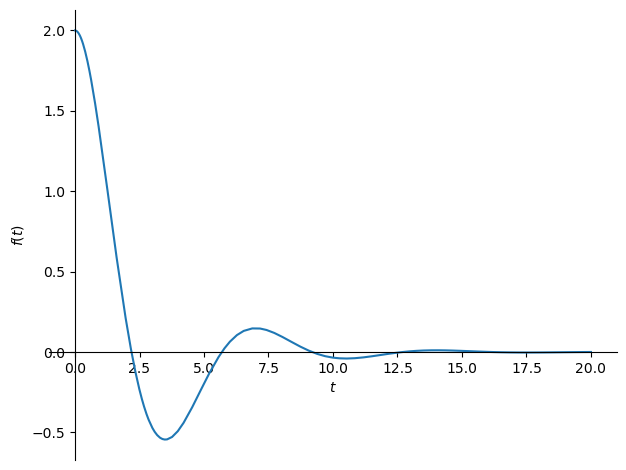

In [35]:
plot(x.subs(xbet_sol).simplify().subs({A_0:2, r: sqrt(2/(3*cos(pi/4))), delta:pi/4}), (t,0,20))

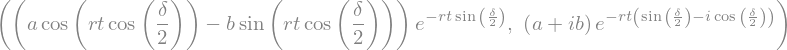

In [36]:
x_sim = x.simplify()
z_sim = l1.simplify()
x_sim, z_sim

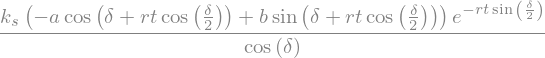

In [37]:
k = k_s*(1+sin(delta)/cos(delta)*I)
f2 = re(-k*z_sim).simplify()
f2

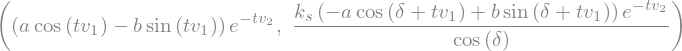

In [38]:
v1, v2 = symbols('v1 v2', real=True)
k1 = x_sim.subs({r*cos(delta/2): v1, r*sin(delta/2): v2})
k2 = f2.subs({r*cos(delta/2): v1, r*sin(delta/2): v2})
k1, k2

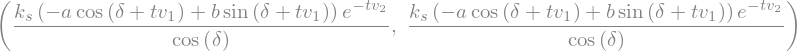

In [39]:
xdd = k1.diff(t,2).subs({v1:r*cos(delta/2), v2:r*sin(delta/2)}).simplify().subs({r*cos(delta/2): v1, r*sin(delta/2): v2}).simplify()
lig1 = m * xdd.subs({r: sqrt(k_s/(m*cos(delta)))})
lig2 = k2
lig1, lig2

In [40]:
lig1-lig2

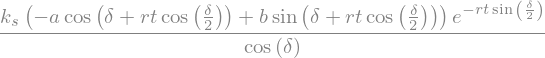

In [41]:
lig1.subs({v1: r*cos(delta/2), v2: r*sin(delta/2)}).simplify()

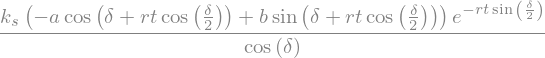

In [42]:
lig2.subs({v1: r*cos(delta/2), v2: r*sin(delta/2)}).simplify()

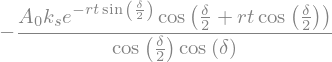

In [43]:
F_FHMbet = lig2.subs({v1: r*cos(delta/2), v2: r*sin(delta/2)}).subs(xbet_sol).simplify()
F_FHMbet

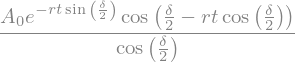

In [44]:
x_bet = x_sim.subs(xbet_sol).simplify()
x_bet

In [45]:
def mf(a0, ks, m_, d):
    subs_set = {A_0:a0, delta:d, k_s:ks, r:sqrt(ks/(m_*cos(d)))}
    return Matrix([x_bet.subs(subs_set), F_FHMbet.subs(subs_set)])


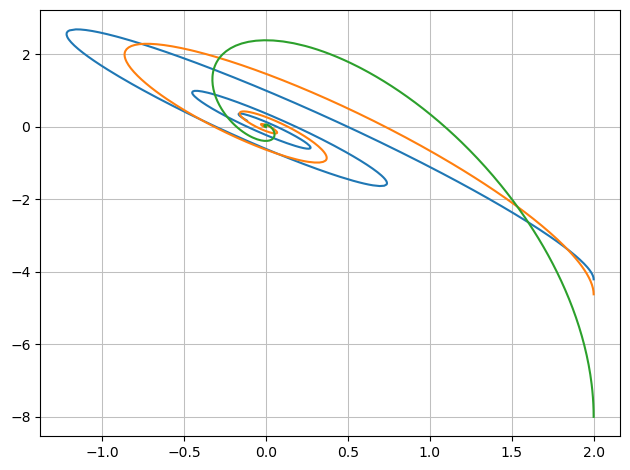

In [46]:
combi = sum([
        dtuplot.plot_parametric(
        *mf(2, 2, 3, delta_), (t,0,20), 
        show=False, use_cm=False) 
    for delta_ in [pi/10, pi/6, pi/3]])
    
combi.legend = False
combi.show()

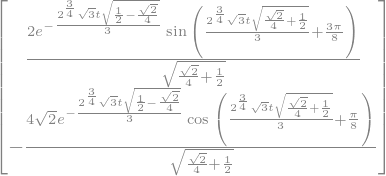

In [47]:
mf(2, 2, 3, pi/4)

In [49]:
# plot real spring mass system
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib qt
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-2, 5)
ax.set_ylim(-1, 6)
ax.set_aspect('equal')

x1, y1 = mf(2, 2, 3, pi/10)[0], mf(2, 2, 3, pi/10)[1]
x2, y2 = mf(2, 2, 3, pi/6)[0], mf(2, 2, 3, pi/6)[1]
x3, y3 = mf(2, 2, 3, pi/3)[0], mf(2, 2, 3, pi/3)[1]

# lambdify the function
t_vals = np.linspace(0, 20, 1000)

x1f, x2f, x3f = lambdify(t, x1, 'numpy'), lambdify(t, x2, 'numpy'), lambdify(t, x3, 'numpy')
y1f, y2f, y3f = lambdify(t, y1, 'numpy'), lambdify(t, y2, 'numpy'), lambdify(t, y3, 'numpy')

x1_vals, x2_vals, x3_vals = x1f(t_vals), x2f(t_vals), x3f(t_vals)
y1_vals, y2_vals, y3_vals = y1f(t_vals), y2f(t_vals), y3f(t_vals)

# Define the square mass
mass1 = plt.Rectangle((0, 0), 1, 1, fc='blue')
arrow1 = plt.Rectangle((0.5, 0.45), 0, 0.1, fc='red')
spring1 = plt.Rectangle((-2, 0.45), 0, 0.1, fc='green')
text1 = ax.text(3, 0.5, 'd = pi/10', fontsize=10)
ax.add_patch(mass1)
ax.add_patch(arrow1)
ax.add_patch(spring1)

mass2 = plt.Rectangle((0, 2), 1, 1, fc='blue')
arrow2 = plt.Rectangle((0.5, 2.45), 0, 0.1, fc='red')
spring2 = plt.Rectangle((-2, 2.45), 0, 0.1, fc='green')
text2 = ax.text(3, 2.5, 'd = pi/6', fontsize=10)
ax.add_patch(mass2)
ax.add_patch(arrow2)
ax.add_patch(spring2)

mass3 = plt.Rectangle((0, 4), 1, 1, fc='blue')
arrow3 = plt.Rectangle((0.5, 4.45), 0, 0.1, fc='red')
spring3 = plt.Rectangle((-2, 4.45), 0, 0.1, fc='green')
text3 = ax.text(3, 4.5, 'd = pi/3', fontsize=10)
ax.add_patch(mass3)
ax.add_patch(arrow3)
ax.add_patch(spring3)

# Define the update function for the animation
def update(t):
    # Update the position of the square mass
    mass1.set_xy((x1_vals[t], 0))
    arrow1.set_xy((x1_vals[t]+0.5, 1))
    arrow1.set_width(y1_vals[t])
    spring1.set_width(x1_vals[t]+2)
    
    mass2.set_xy((x2_vals[t], 2))
    arrow2.set_xy((x2_vals[t]+0.5, 3))
    arrow2.set_width(y2_vals[t])
    spring2.set_width(x2_vals[t]+2)
    
    mass3.set_xy((x3_vals[t], 4))
    arrow3.set_xy((x3_vals[t]+0.5, 5))
    arrow3.set_width(y3_vals[t])
    spring3.set_width(x3_vals[t]+2)
    
    return

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=len(t_vals), interval=1)

# Show the animation
plt.show()

In [1]:
from spb import *
A0, ks, m_, delta_ = symbols('A0 ks m d')
dtuplot.plot_parametric(*mf(A0, ks, m_, delta_), 
                        (t,0,20), backend=PB, use_cm=False,
                        params={delta_:(pi/10,0,pi/2), A0:(2,0,5), ks:(2,0,5), m_:(3,0,20)}) 

NameError: name 'symbols' is not defined